# Explore here

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index

✅ SUBMISSION CREATED: submission.csv
⏱️ Test Period: 2019-12-30 to 2020-06-30
📊 Model Performance:
- MAE: 0.62 meters
- Target Range: -7.0-0.0 meters


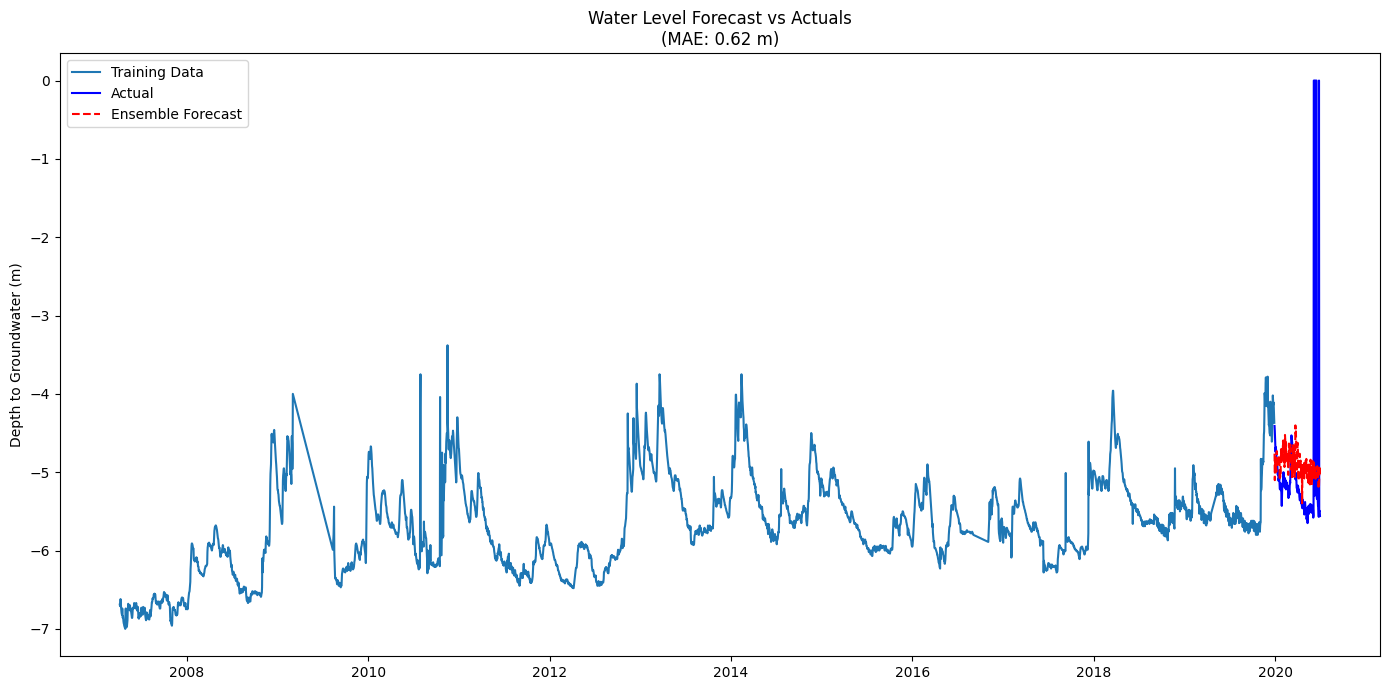

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Read the CSV file
df = pd.read_csv('Aquifer_Auser.csv')
target_col = 'Depth_to_Groundwater_SAL'

# Preprocessing with datetime conversion
df = df[['Date', target_col, 'Rainfall_Orentano', 'Temperature_Orentano']].dropna()
# Handle European date format (DD/MM/YYYY)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['day_of_year'] = df['Date'].dt.dayofyear
df['month'] = df['Date'].dt.month

# Train-test split (last 6 months for test)
test_cutoff = df['Date'].max() - pd.DateOffset(months=6)
train = df[df['Date'] < test_cutoff]
test = df[df['Date'] >= test_cutoff]

# Time Series Model (SARIMA)
ts_model = SARIMAX(train[target_col], 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12)).fit(disp=False)
ts_forecast = ts_model.forecast(steps=len(test))

# Supervised Model (Random Forest)
X_train = train[['day_of_year', 'month', 'Rainfall_Orentano', 'Temperature_Orentano']]
y_train = train[target_col]
X_test = test[['day_of_year', 'month', 'Rainfall_Orentano', 'Temperature_Orentano']]

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Ensemble predictions (simple average)
final_pred = (ts_forecast.values + rf_pred) / 2

# Generate submission file
submission = pd.DataFrame({
    'date': test['Date'],
    'water_level': final_pred
})
submission.to_csv('submission.csv', index=False)

# Evaluation metrics
mae = mean_absolute_error(test[target_col], final_pred)
print(f"✅ SUBMISSION CREATED: submission.csv")
print(f"⏱️ Test Period: {test['Date'].min().date()} to {test['Date'].max().date()}")
print(f"📊 Model Performance:")
print(f"- MAE: {mae:.2f} meters")
print(f"- Target Range: {df[target_col].min():.1f}-{df[target_col].max():.1f} meters")

# Visual validation
plt.figure(figsize=(14,7))
plt.plot(train['Date'], train[target_col], label='Training Data')
plt.plot(test['Date'], test[target_col], label='Actual', color='blue')
plt.plot(test['Date'], final_pred, label='Ensemble Forecast', color='red', linestyle='--')
plt.title('Water Level Forecast vs Actuals\n(MAE: {:.2f} m)'.format(mae))
plt.ylabel('Depth to Groundwater (m)')
plt.legend()
plt.tight_layout()
plt.savefig('forecast_validation.png')
plt.show()

In [8]:
import pandas as pd

# Use this exact path
data = pd.read_csv('/workspaces/BaX/data/raw/Aquifer_Auser.csv')

# Show first rows
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/BaX/data/raw/Aquifer_Auser.csv'